<center> <img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> I.F. Gerardo Ruiz Velazco, Erick Mendoza, Juan Pablo Rivera y Antonio Rosas </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Jun 2021 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/Jpriverasaha/Pap_O_Defi'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Lab 1 </font> <br> <br> <font color= #555555> <font size = 5> Montecarlo Bitcoin   </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3>  Include here a description of the whole work, use no more than 400 words, you can use **Bold** and *Italic* highlights, also you can inclue [links](www.iteso.mx). Usually is a good strategy to generate this text at the very end of the process, since you have to include all aspects of the work, from a brief introduction, to problem definitions and methods used, to finally the results found. </font>

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

This is an introduction, normally, it is done at the very end, when all the other content in the notebook is completed but just before the abstract (which is short version of the introduction) ... 

<br>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

## <font color= #6B6B6B> 2.2 Python Packages </font> <font color= #555555>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas>=1.1.1 
- numpy>=1.19.1
- jupyter>=1.0.0
- _Add any other here_

## <font color= #6B6B6B> 2.3 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- files/precios.csv : Precios históricos
- files/datos.txt : Otros datos históricos

## <font color= #6E6E6E> 2.3 Install Packages</font>

In [1]:
%%capture

# Install all the pip packages in the requirements.txt
import sys
!{sys.executable} -m pip install -r requirements.txt

<br>

# <font color= #6B6B6B> 3. Data Description </font>

<hr style="border:0.02in solid gray"> </hr>

In [13]:
import data as dt
import functions as fn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

### Evolución del precio del Bitcoin desde hace 1 año

Información sacada de ccxt.binance

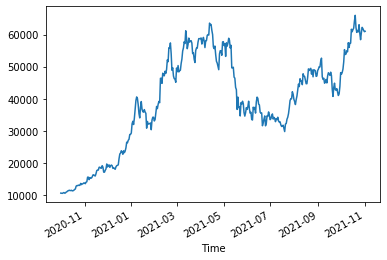

In [3]:
dt.data.plot()

## Sacamos el rendimiento logaritmico y observamos su distribución 

C:\Users\Juan Pablo\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

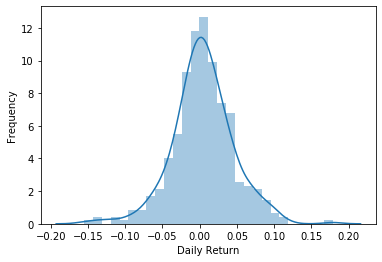

In [10]:
log_returns = np.log(1 + dt.data.pct_change())
#Plot
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

## Calculamos el Drift 
Que es la dirección que han tenido las tasas de rendimiento en el pasado

In [11]:
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)

## Generamos las variables aleatorias 
Generamos variables aleatorias para cada dia pronosticado 

In [14]:
stdev = log_returns.std()
days = 50
trials = 10000
Z = norm.ppf(np.random.rand(days, trials))
daily_returns = np.exp(drift + stdev * Z)

## Calculamos un precio nuevo para cada simulación 

In [16]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = dt.data.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

## Graficamos las simulaciones 

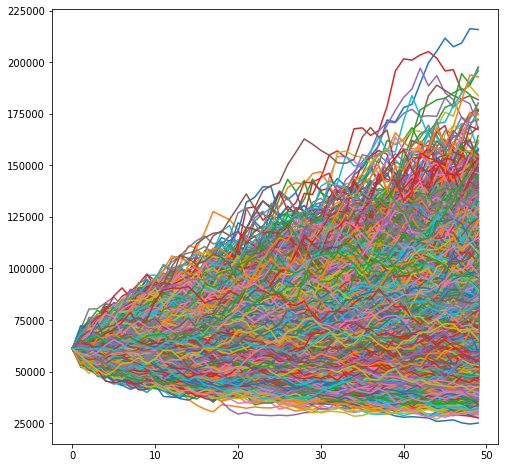

In [17]:
plt.figure(figsize=(8,8))
plt.plot(price_paths)
plt.show()

# <font color= #6B6B6B> 4. A particular Process  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<br>

# <font color= #6B6B6B> <font size = 6> 5. Results </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

## <font color= #6B6B6B> 5.1 Results of first processes </font>

<br>

<br>

# <font color= #6B6B6B> <font size = 6> 6. References </font>

<hr style="border:0.02in solid gray"> </hr>

https://medium.com/analytics-vidhya/monte-carlo-simulations-for-predicting-stock-prices-python-a64f53585662

[1] Munnoz, 2020. Python project template. https://github.com/iffranciscome/python-project. (2021).